<a href="https://colab.research.google.com/github/s-kp/CapstoneProject-MLClassification/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>



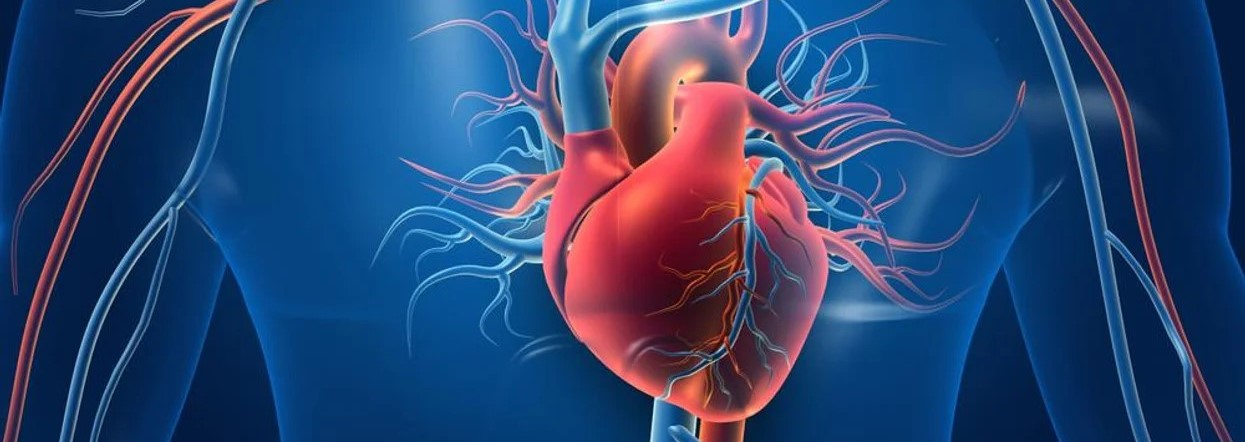

## <b>Data Description </b>
### <b>Demographic:</b>
* ### Sex: male or female("M" or "F")
* ### Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* ### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* ###  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* ###  BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* ###  Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* ###  Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* ###  Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* ###  Tot Chol: total cholesterol level (Continuous)
* ###  Sys BP: systolic blood pressure (Continuous)
* ###  Dia BP: diastolic blood pressure (Continuous)
* ###  BMI: Body Mass Index (Continuous)
* ###  Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* ###  Glucose: glucose level (Continuous)
Predict variable (desired target)
* ###  10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV




# **Data Preparation**

## **Importing and Inspecting Dataset**

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Defining url of saved csv file
url = 'https://drive.google.com/uc?id=1cLHnV4i76jY4t5-dvZuXwntO5G3gYnJ0'

# Importing dataset to create a dataframe
data = pd.read_csv(url)

In [ ]:
# Checking shape pf dataframe
data.shape

(3390, 17)

In [ ]:
# Checking top 5 records in dataframe
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Checking bottom 5 records in dataframe
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# Dropping the id column
data.drop(columns=['id'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:
data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#Check all the coloumns present in our dataset
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## **Missing Values Treatment**

In [ ]:
# Missing data counts and percentage
missing = data.columns[data.isnull().any()].tolist()

print('Missing Data Count')
print(data[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(data[missing].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [ ]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  data[col] = data[col].fillna(data[col].median())

# **Exploratory Data Analysis**

In [ ]:
# Lets check the discrete and continuous features
categorical_features = [i for i in data.columns if data[i].nunique()<=4]
numeric_features = [i for i in data.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


## **Handling Outliers**

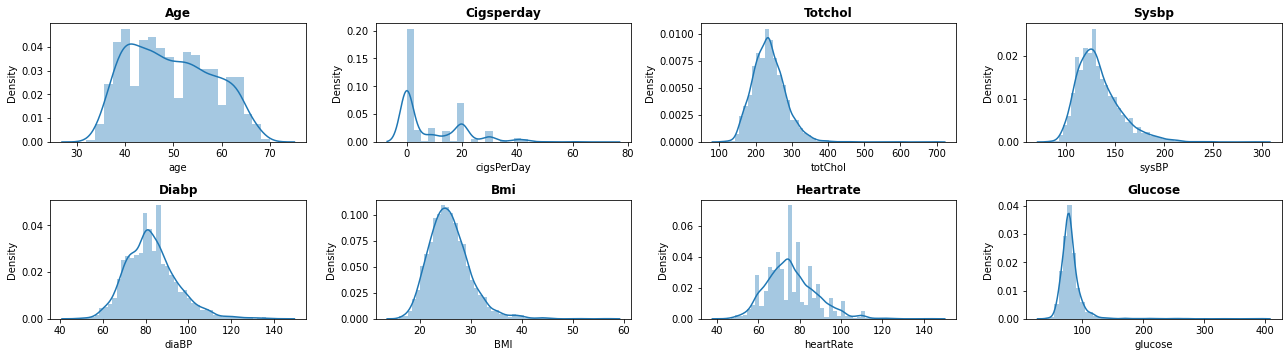

In [ ]:
# Visualizing the distributions.
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

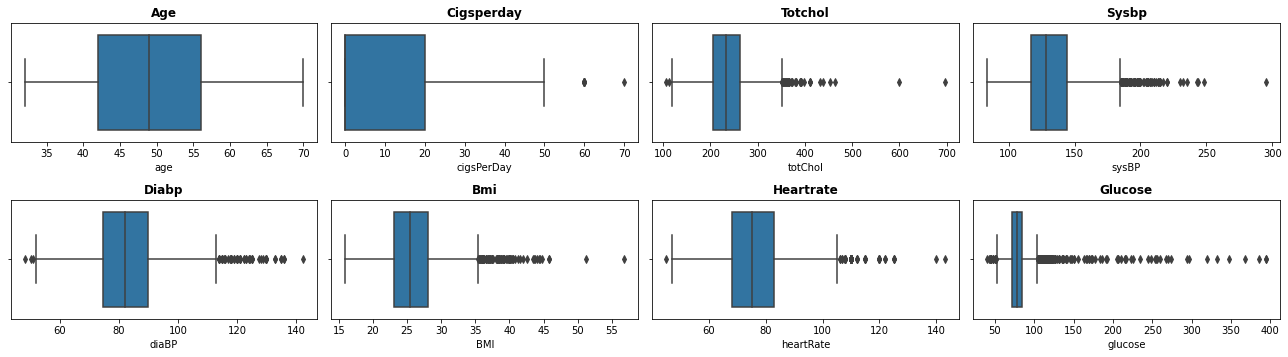

In [ ]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
# Removing outliers by standard methods and Plotting graphs:
df = data.copy()
for col in numeric_features:
  # Using IQR method to define the range of inliners:
  q1, q3, median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  df[col] = np.where(df[col] > upper_limit, median,np.where(
                         df[col] < lower_limit,median,df[col]))

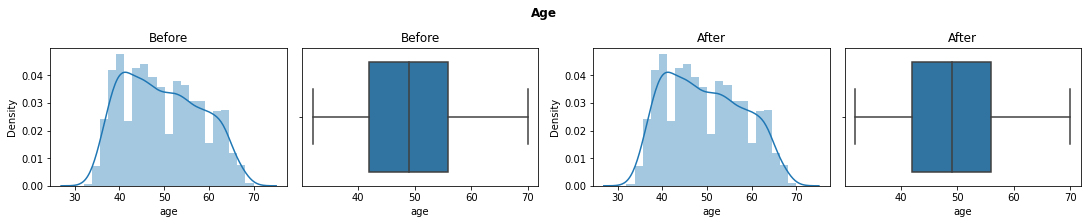

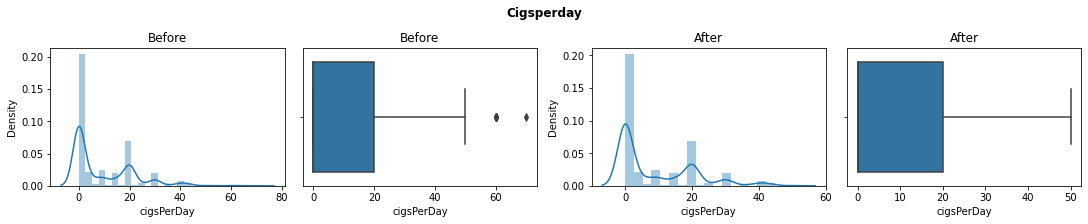

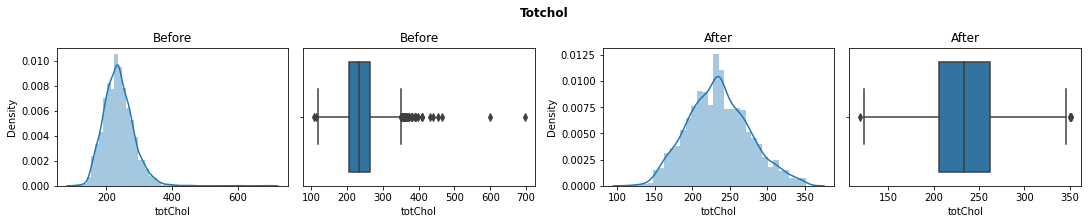

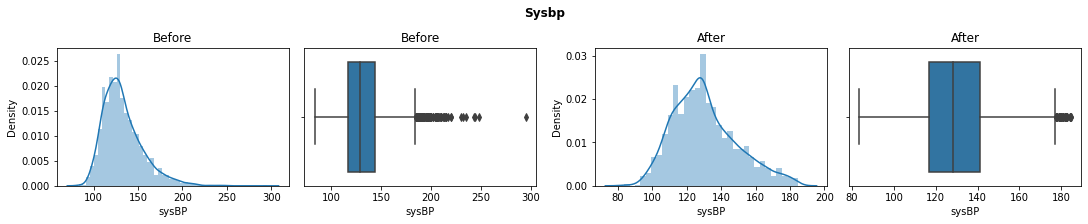

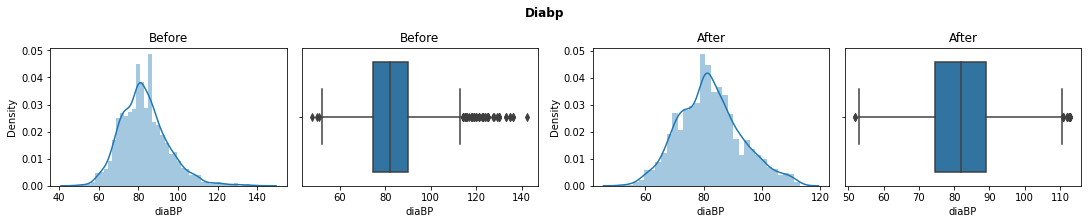

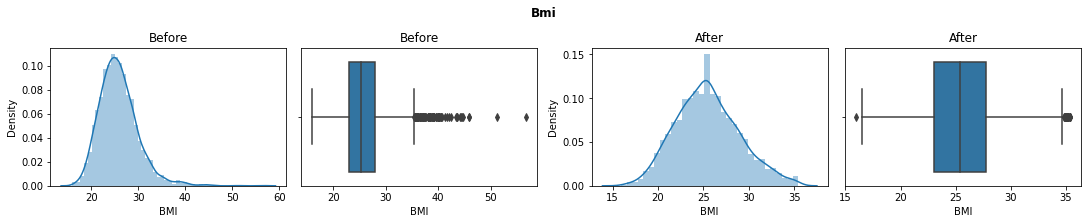

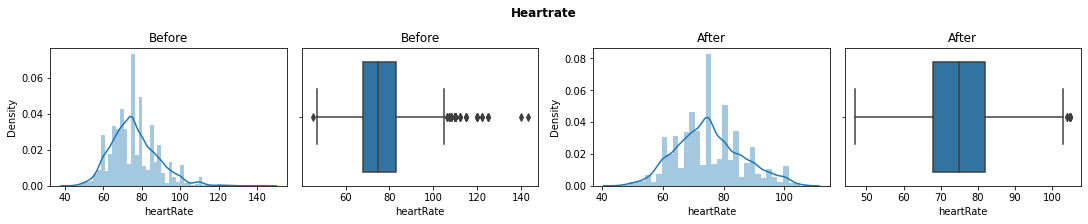

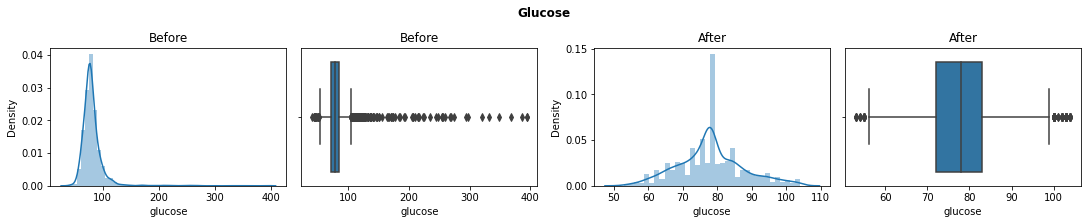

In [ ]:
# Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(data[col], ax=ax[0]).set(title="Before")
  sns.boxplot(data[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(df[col], ax=ax[2]).set(title="After")
  sns.boxplot(df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()



##**Cleaning and Manipulating dataset**

In [ ]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


In [ ]:
# Checking unique value with their counts in categorical features
for col in ['sex', 'is_smoking']:
  print(df[col].value_counts(),'\n')

F    1923
M    1467
Name: sex, dtype: int64 

NO     1703
YES    1687
Name: is_smoking, dtype: int64 



In [ ]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df = df.replace(encoder)

In [ ]:
# Checking Whether all features are numeric or not
len(df.columns) == len(df.describe().columns)

True

In [ ]:
# New look
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


##**Univariate Analysis**

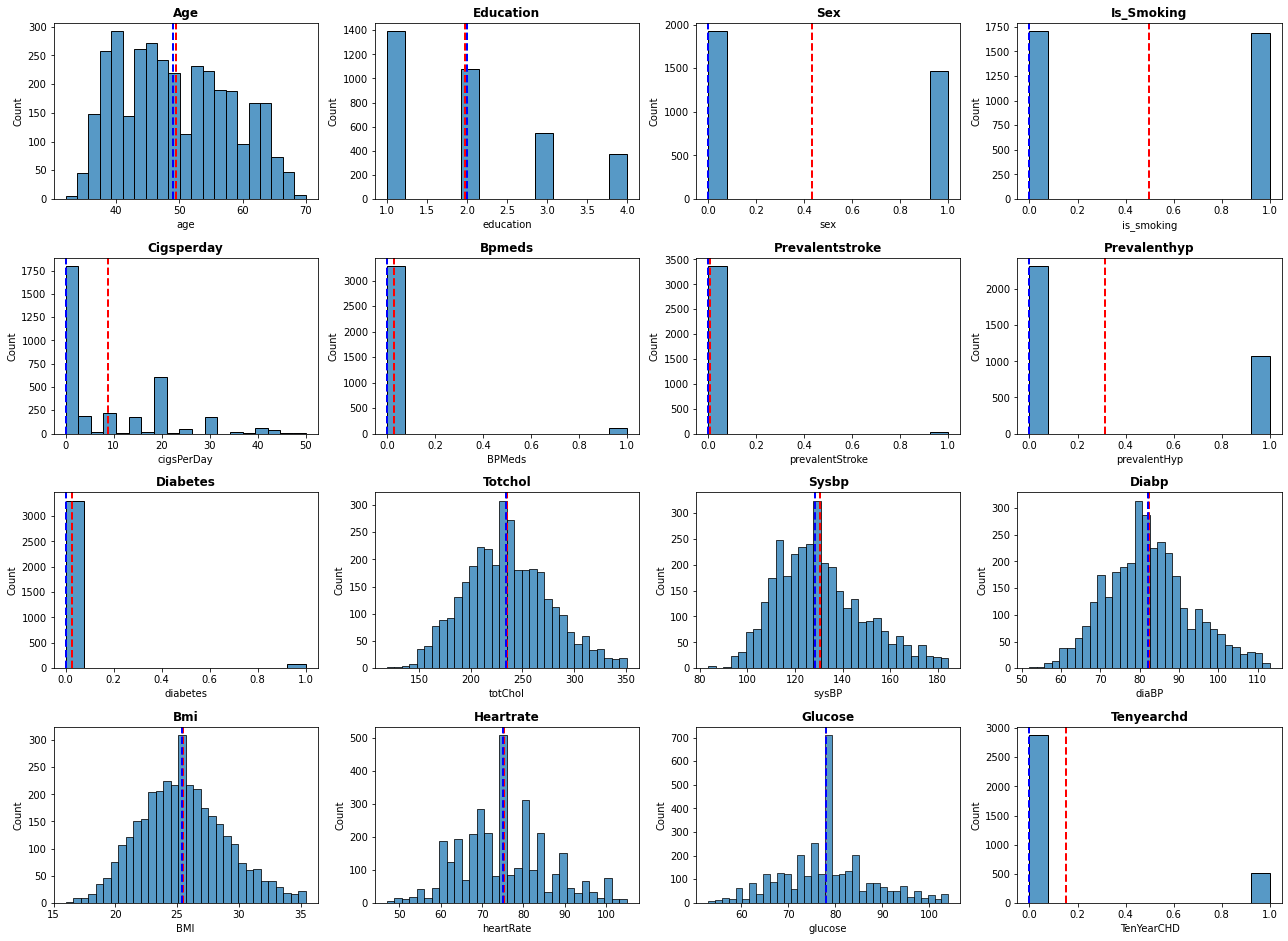

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##**Bivariate Analysis**

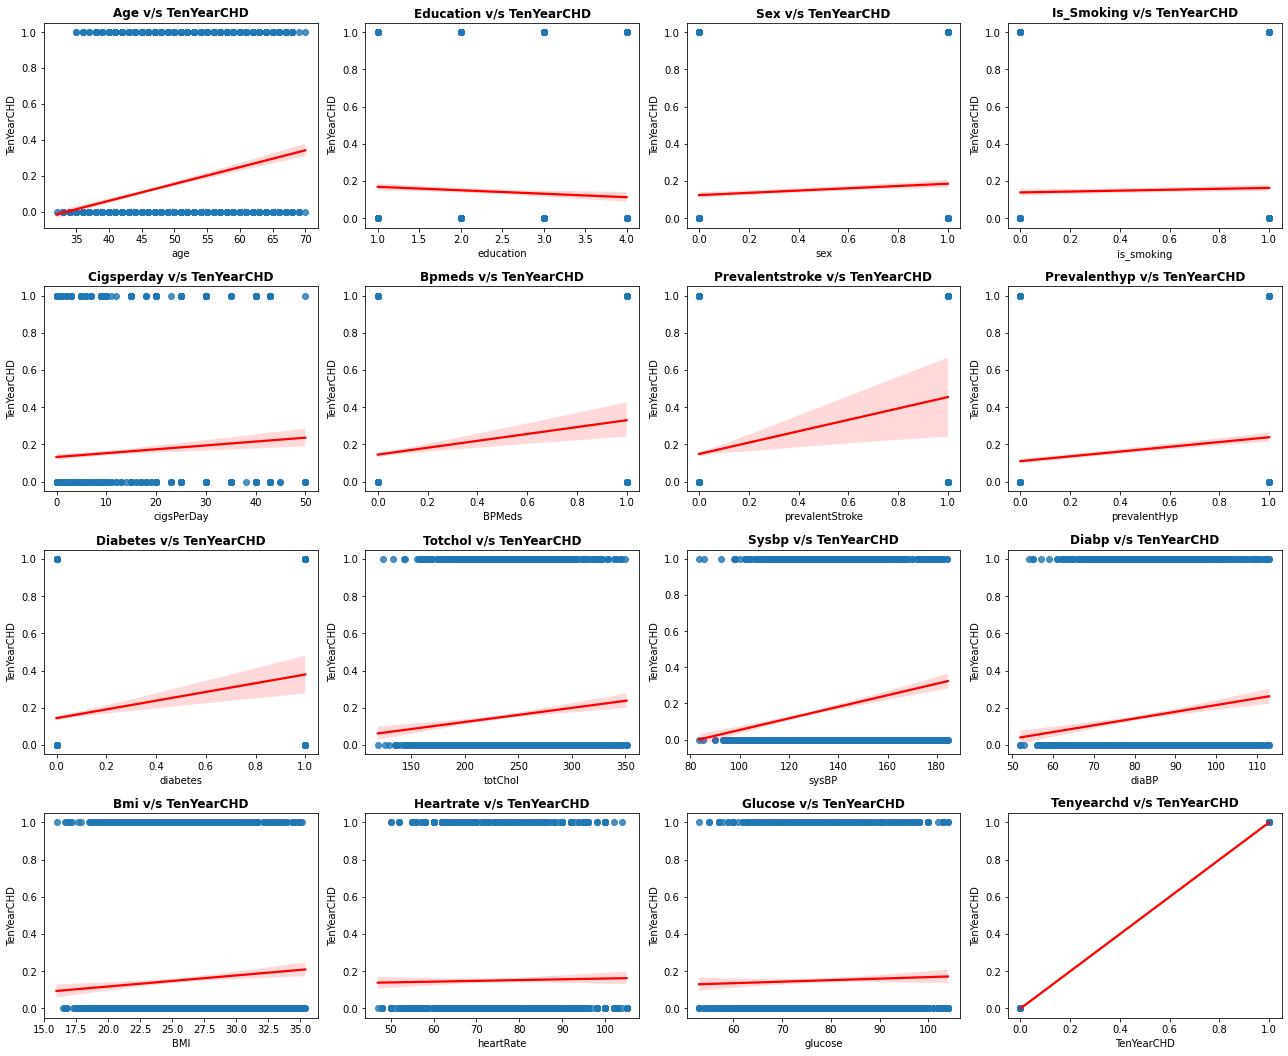

In [ ]:
# Checking Linearity
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]

plt.figure(figsize=(18,18))
for n,column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()



##**Removing Multicolinearity**

In [ ]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables.

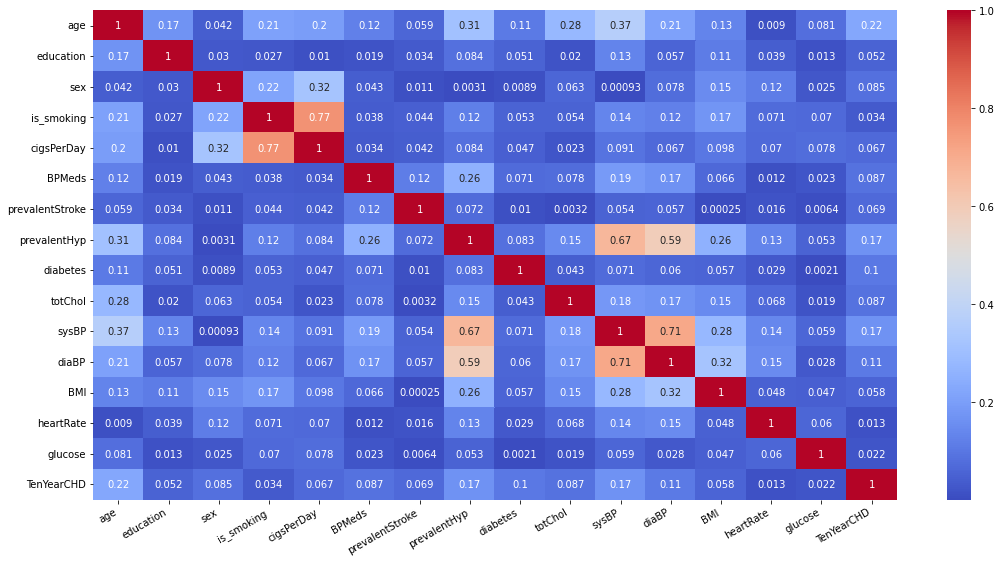

In [ ]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

We can see some highly correlated features. Lets treat them by excluding them from dataset and checking the variance inflation factors.

In [ ]:
# Checking VIF for each variable
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]
calc_vif(df[independent_variables])

,variables,VIF
0,sysBP,132.679399
1,diaBP,127.335444
2,BMI,58.839938
3,glucose,55.695887
4,heartRate,47.760133
5,age,42.764967
6,totChol,37.646845
7,is_smoking,4.955409
8,education,4.831856
9,cigsPerDay,4.195606


In [ ]:
# Summer and Winter are highly correlated with temperature. Hence removing them
independent_variables = [i for i in df.columns if i not in ['TenYearCHD','sysBP','diaBP','glucose',
                                                            'BMI','totChol','heartRate','is_smoking']]
calc_vif(df[independent_variables])

,variables,VIF
0,age,5.513455
1,education,4.100370
2,sex,1.968156
3,cigsPerDay,1.733136
4,prevalentHyp,1.686226
5,BPMeds,1.120401
6,diabetes,1.044716
7,prevalentStroke,1.024945


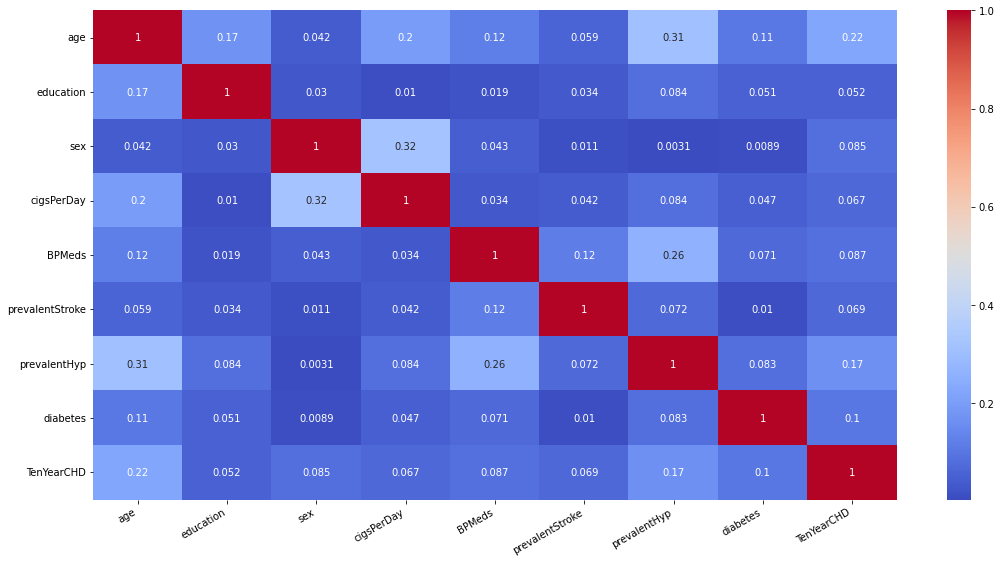

In [ ]:
# Updating the dataset
dataset = df[independent_variables + ['TenYearCHD']]

#checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(dataset.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:
# Checking top 5 rows of the cleaned dataset
dataset.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,64.0,2.0,0,3.0,0.0,0,0,0,1
1,36.0,4.0,1,0.0,0.0,0,1,0,0
2,46.0,1.0,0,10.0,0.0,0,0,0,0
3,50.0,1.0,1,20.0,0.0,0,1,0,1
4,64.0,1.0,0,30.0,0.0,0,0,0,0




#**Model building**

##**Prerequisites**

In [ ]:
# Defining variables required
scaler = MinMaxScaler()
scoring = make_scorer(f1_score, pos_label=1)
features = [i for i in df.columns if i not in ['TenYearCHD']]

# Splitting the data into train and test
X = scaler.fit_transform(df[independent_variables])
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

# Handling class imbalance by oversampling followed by removing the Tomek link
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    2305
1     407
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
0    2199
1    2199
Name: TenYearCHD, dtype: int64 



In [ ]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = independent_variables
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

##**Logistic Regression**

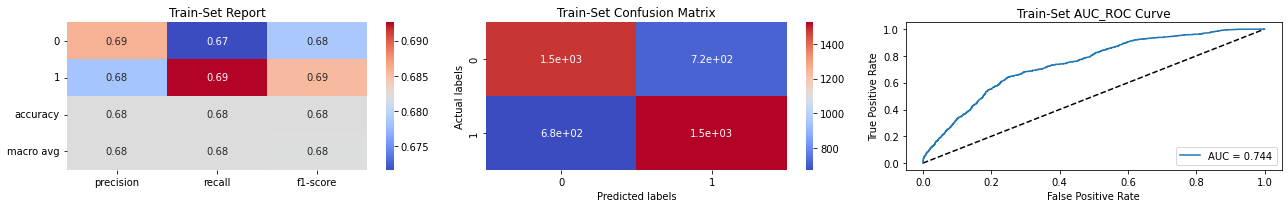

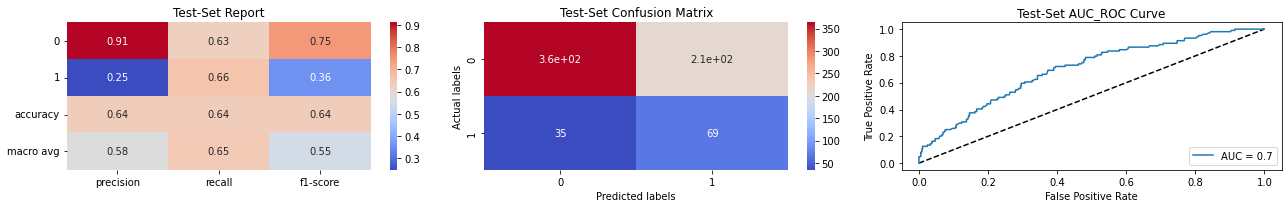

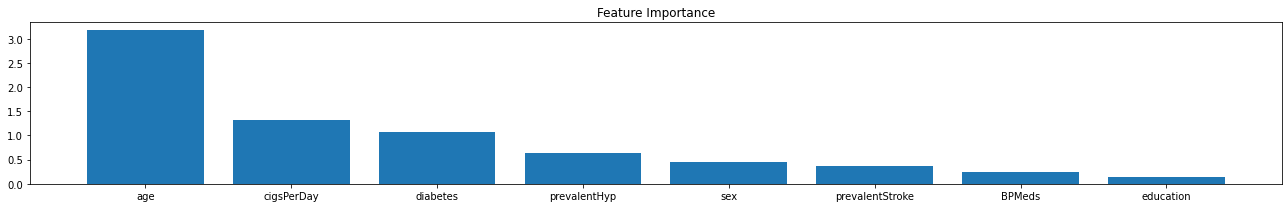

LogisticRegression(max_iter=10000)

In [ ]:
# Fitting Logistic Regression Model
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
analyse_model(lr, X_smote, X_test, y_smote, y_test)

##**Naive Bayes Classifier**

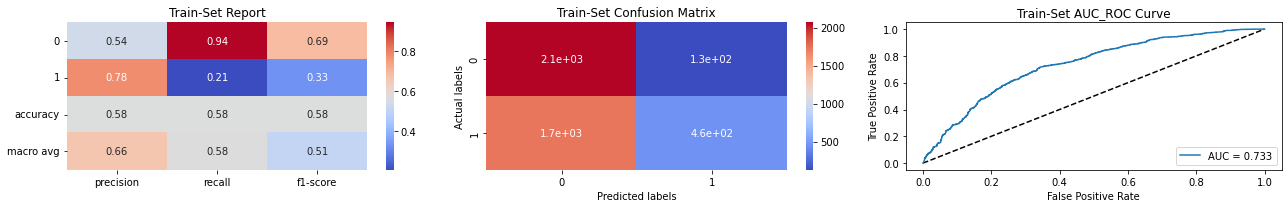

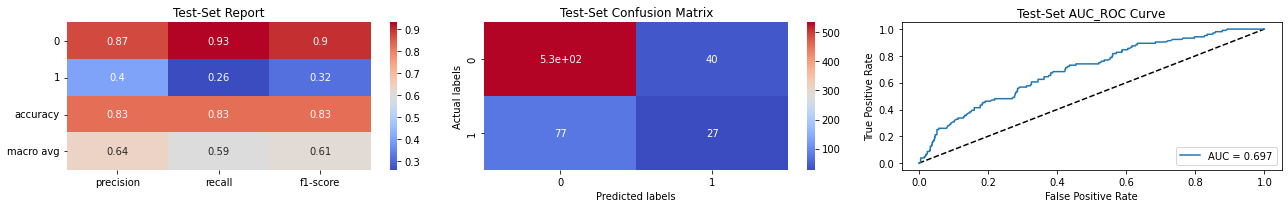

<Figure size 1296x216 with 0 Axes>

GaussianNB()

In [ ]:
# Fitting Naive Bayes Classifier
nbc = GaussianNB()
analyse_model(nbc, X_smote, X_test, y_smote, y_test)

##**Support Vector Classifier**

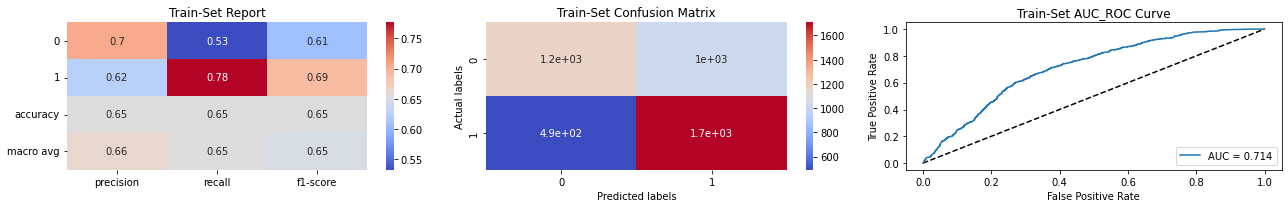

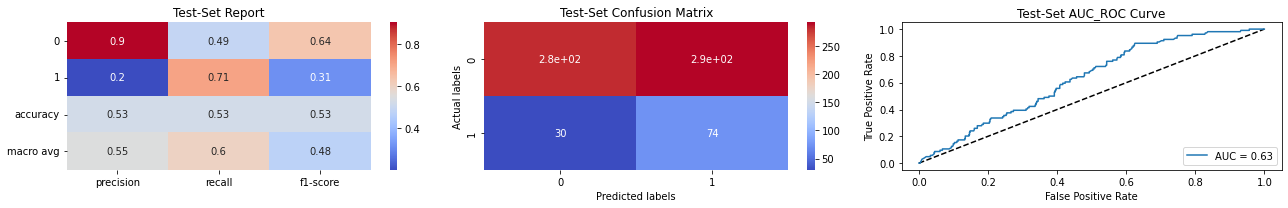

<Figure size 1296x216 with 0 Axes>

SVC(C=0.1, max_iter=1000, probability=True, random_state=0)

In [ ]:
# SVM algorithm
clf = SVC(random_state= 0,probability=True)

# HYperparameter Grid
grid = {'kernel': ["linear","rbf","poly","sigmoid"],
        'C': [0.1, 1, 10, 100],
        'max_iter' : [1000]}

# GridSearch to find the best parameters
svc = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
svc.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(svc.best_estimator_, X_smote, X_test, y_smote, y_test)

##**Random Forest Classifier**

In [ ]:
# Splitting the data into train and test by redefining X
X = scaler.fit_transform(df[features])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

# Handling class imbalance by oversampling followed by removing the Tomek link
X_smote, y_smote = SMOTETomek(random_state=45).fit_resample(X_train, y_train)

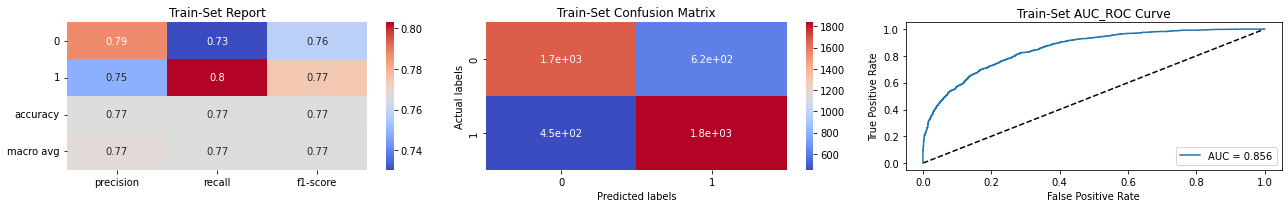

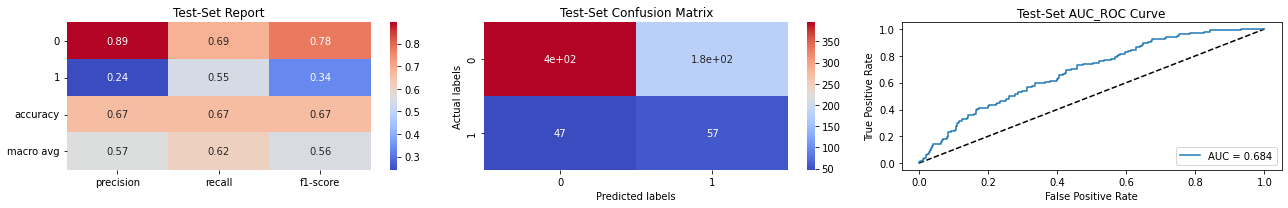

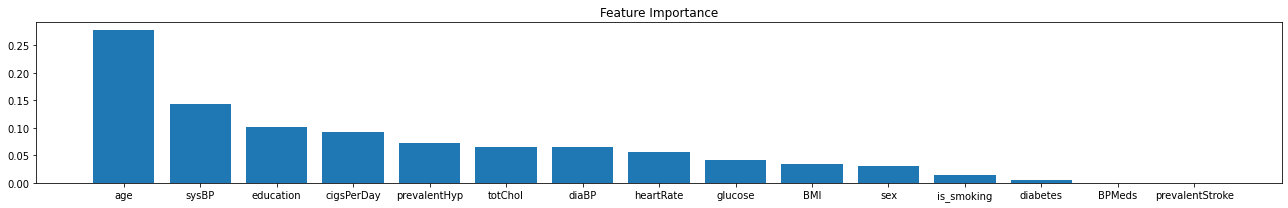

RandomForestClassifier(max_depth=8, min_samples_leaf=46, min_samples_split=50,
                       random_state=2)

In [ ]:
# Classifier
clf = RandomForestClassifier(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}

# GridSearch to find the best parameters
rf = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
rf.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(rf.best_estimator_, X_smote, X_test, y_smote, y_test)

##**XGBoost Classifier**

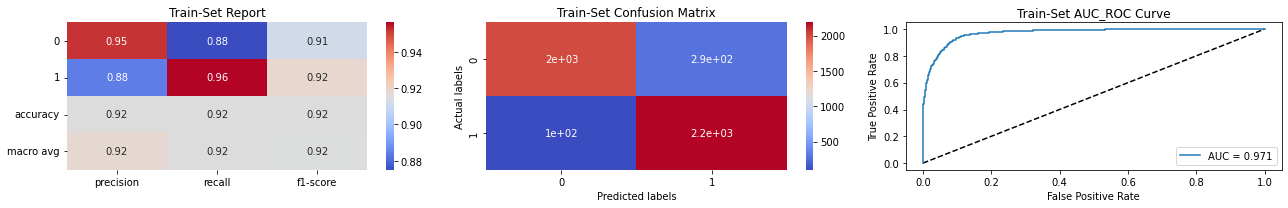

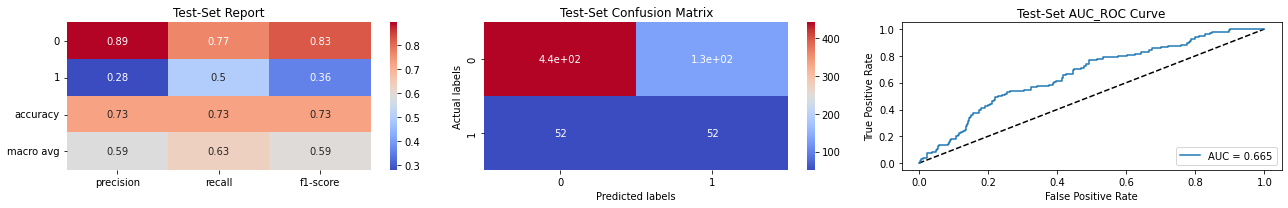

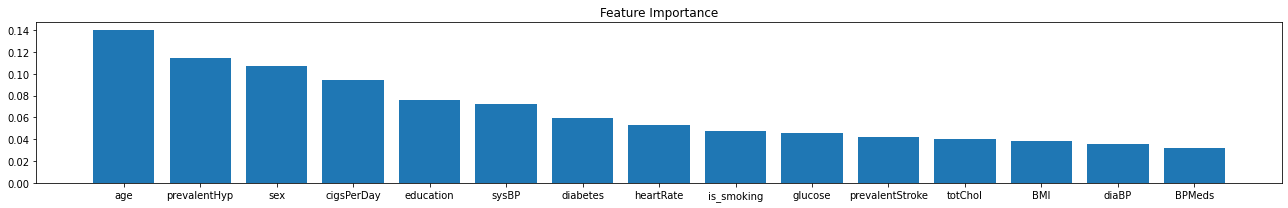

XGBRFClassifier(eta=0.05, max_depth=10, min_samples_leaf=30,
                min_samples_split=50, n_estimators=150, random_state=3,
                silent=True)

In [ ]:
# Classifier
clf = XGBRFClassifier(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'min_samples_split' : [50,100],
        'min_samples_leaf' : [30,50],
        'eta' : [0.05,0.08,0.1]}

# GridSearch to find the best parameters
xgb = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
xgb.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(xgb.best_estimator_, X_smote, X_test, y_smote, y_test)

##**KNN Classifier**

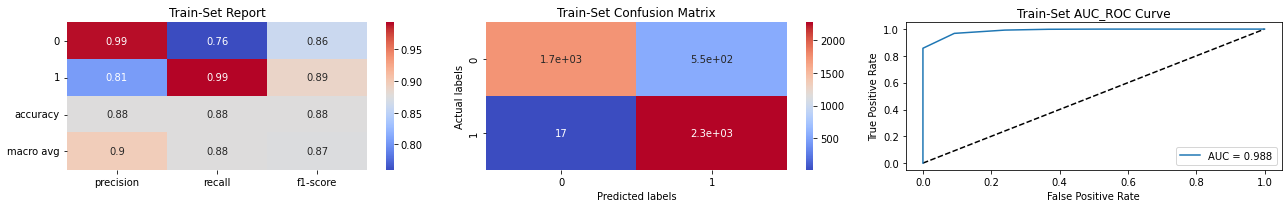

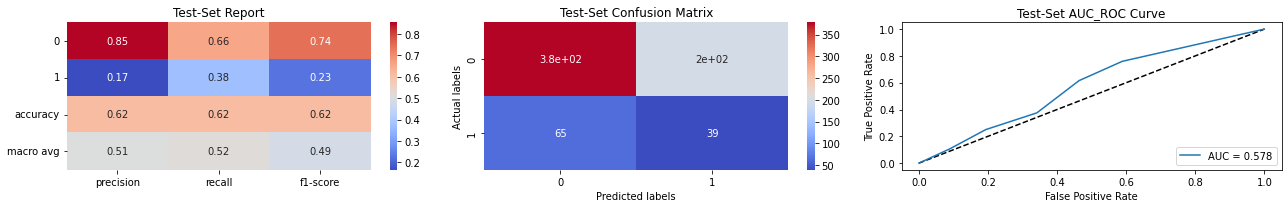

<Figure size 1296x216 with 0 Axes>

KNeighborsClassifier(metric='manhattan')

In [ ]:
# Classifier
clf = KNeighborsClassifier()

# HYperparameter Grid
grid = {'n_neighbors' : [5,7,9],
        'metric' : ['minkowski','euclidean','manhattan']}

# GridSearch to find the best parameters
knn = GridSearchCV(clf, param_grid = grid, scoring = scoring, cv=5)
knn.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(knn.best_estimator_, X_smote, X_test, y_smote, y_test)

##**Conclusion**

1. If we want to completely avoid any situations where the patient has heart disease, a high recall is desired. Whereas if we want to avoid treating a patient with no heart diseases a high precision is desired.
2. Assuming that in our case the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, so we want a balance between precision and recall and a high f1 score is desired.
3. Since we have added synthetic datapoints to handle the huge class imbalance in training set, the data distribution in train and test are different so the high performance of models in the train set is due to the train-test data distribution mismatch and not due to overfitting.
4. Best performance of Models on test data based on evaluation metrics for class 1:
  1. Recall - SVC
  2. Precision - Naive Bayes Classifier
  3. F1 Score - Logistic Regression, XGBoost
  4. Accuracy - Naive Bayes Classifier
